In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MFG 598/Final Project/dataset.csv')

In [4]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [6]:
df.isnull().sum()

,0
Text,0
Label,0


In [7]:
df.duplicated().sum()

98

In [8]:
# we have to delete the repeated lines
df = df.drop_duplicates()
df.shape

(2127, 2)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Label
0    403
1    505
2    347
3    369
4    503
Name: count, dtype: int64


<ipython-input-10-2baeba6443c5>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])


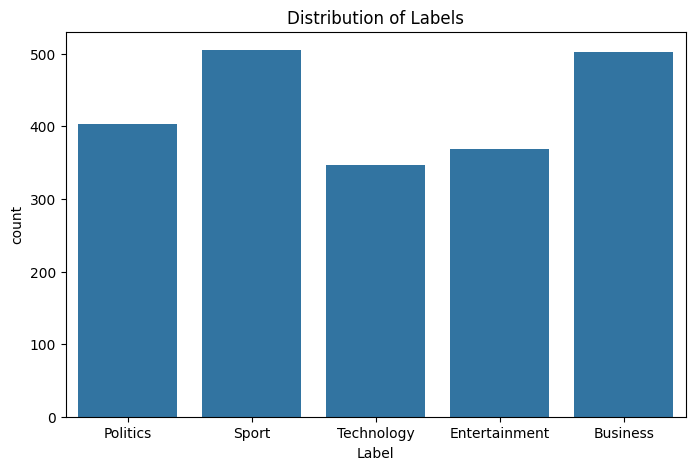

In [10]:
print(df.Label.value_counts().sort_index())
fig, ax=plt.subplots(figsize=(8,5))
sns.barplot(x=df.Label.value_counts().index, y=df.Label.value_counts(), ax=ax)
ax.set_title("Distribution of Labels")
ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])
plt.show()

Text Cleaning

In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
def clean_text(text):
    text = re.sub('\n', " ", text)
    text = re.sub(r'[^a-zA-Z]', " ", text)
    text = re.sub(r'\s+', " ", text)
    text = text.lower()
    text = text.split()
    text = [j for j in text if len(text) > 1]
    text = [i for i in text if not i in set(stopwords.words("english"))]
    text = " ".join(text)
    return text

df["cleaned_text"] = df["Text"].apply(clean_text)

In [13]:
df.head()

,Text,Label,cleaned_text
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...


Text statistics

In [14]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x)))

df.head()

,Text,Label,cleaned_text,word_count,text_length
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833


In [15]:
df.groupby('Label').describe()

word_count                                                             \
           count        mean         std   min    25%    50%    75%     max   
Label                                                                         
0          403.0  254.679901  154.416424  48.0  182.0  251.0  297.5  2203.0   
1          505.0  182.978218  104.324649  62.0  114.0  154.0  224.0   930.0   
2          347.0  292.066282  129.308426  96.0  206.5  268.0  357.0  1466.0   
3          369.0  192.376694  138.266565  83.0  132.0  157.0  208.0  1777.0   
4          503.0  193.272366   77.771625  75.0  137.0  178.0  228.0   510.0   

      text_length                                                           \
            count         mean          std    min     25%     50%     75%   
Label                                                                        
0           403.0  1837.148883  1107.768077  340.0  1311.5  1801.0  2155.5   
1           505.0  1259.530693   714.180746  439.0   787.0  1079.0  1523.0   
2           347.0  2079.564841   910.098390  648.0  1456.5  1890.0  2589.5   
3           369.0  1329.907859   942.519892  550.0   903.0  1082.0  1447.0   
4           503.0  1391.568588   569.946327  537.0   983.5  1278.0  1661.0   

                
           max  
Label           
0      16135.0  
1       6365.0  
2      10047.0  
3      11878.0  
4       3720.0

In [16]:
df = df.loc[df['word_count'] >= 75]
df = df.loc[df['word_count'] <= 760]
df.groupby('Label').describe()

word_count                                                             \
           count        mean         std   min    25%    50%     75%    max   
Label                                                                         
0          399.0  244.208020   81.986390  83.0  182.0  251.0  297.00  543.0   
1          491.0  182.955193   94.647887  75.0  117.0  156.0  226.50  630.0   
2          345.0  287.092754  109.238977  96.0  206.0  268.0  357.00  686.0   
3          366.0  182.486339   81.321574  83.0  132.0  156.0  207.75  677.0   
4          503.0  193.272366   77.771625  75.0  137.0  178.0  228.00  510.0   

      text_length                                                          \
            count         mean         std    min     25%     50%     75%   
Label                                                                       
0           399.0  1762.716792  590.103600  560.0  1311.5  1799.0  2149.0   
1           491.0  1259.476578  650.787379  485.0   807.5  1083.0  1536.5   
2           345.0  2045.672464  779.141918  648.0  1456.0  1889.0  2573.0   
3           366.0  1263.292350  568.322409  550.0   901.5  1079.5  1428.5   
4           503.0  1391.568588  569.946327  537.0   983.5  1278.0  1661.0   

               
          max  
Label          
0      3968.0  
1      4336.0  
2      4933.0  
3      4926.0  
4      3720.0

In [17]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x)))

df["stopwords_count"] = df["Text"].apply(lambda x: len([i for i in x.split() if i in set(stopwords.words("english"))]))

df["punct_count"] = df["Text"].apply(lambda x: len([i for i in x if i in string.punctuation]))

df["caps_count"] = df["Text"].apply(lambda x: len([i for i in str(x) if i.isupper()]))

df.head()

,Text,Label,cleaned_text,word_count,text_length,stopwords_count,punct_count,caps_count
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163,200,71,85
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078,204,54,85
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178,201,81,99
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237,176,67,81
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833,163,88,138


In [18]:
grouped_text = df.groupby("Label").agg({"word_count": "mean",
                                        "text_length": "mean",
                                        "stopwords_count": "mean",
                                        "punct_count": "mean",
                                        "caps_count": "mean"})
grouped_text = grouped_text.reset_index(drop=True)
grouped_text

,word_count,text_length,stopwords_count,punct_count,caps_count
0,244.208020,1762.716792,168.837093,65.152882,78.100251
1,182.955193,1259.476578,127.323829,60.038697,74.346232
2,287.092754,2045.672464,194.162319,73.171014,81.527536
3,182.486339,1263.292350,110.333333,53.352459,78.461749
4,193.272366,1391.568588,117.924453,56.699801,61.242545


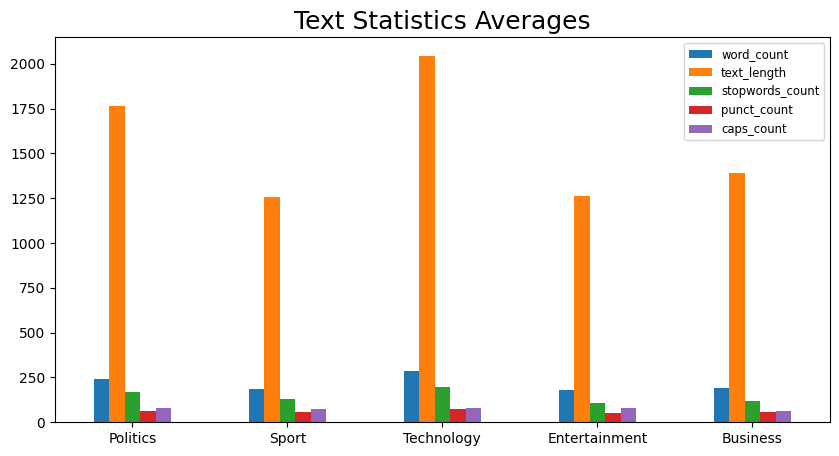

In [19]:
fig, ax=plt.subplots(figsize=(10,5))
grouped_text.plot(kind="bar", ax=ax)
ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])
ax.set_title("Text Statistics Averages", fontsize=18)
ax.legend(fontsize="small")
plt.xticks(rotation=0)
plt.show()

In [20]:
from wordcloud import WordCloud, STOPWORDS

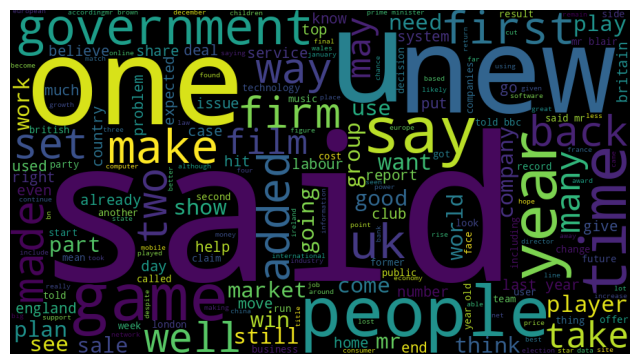

In [21]:
all_cleaned_text = " ".join(df["cleaned_text"])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

Doc2Vec

In [22]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [23]:
data = df['cleaned_text']

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [24]:
Doc2Vec?

In [25]:
model = Doc2Vec(vector_size=384,
                min_count=4, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

In [26]:
document_vectors = [model.infer_vector(
    word_tokenize(doc.lower())) for doc in data]



In [27]:
para_vec = []
for i, doc in enumerate(data):
    # print("Document", i+1, ":", doc)
    para_vec.append(document_vectors[i])
    # print("Vector:", document_vectors[i])
    # print()

In [28]:
df['para_vector'] = para_vec

In [29]:
df.head()

,Text,Label,cleaned_text,word_count,text_length,stopwords_count,punct_count,caps_count,para_vector
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163,200,71,85,"[-0.6922617, -0.15580185, -0.6871097, 1.060947..."
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078,204,54,85,"[-0.70868945, 0.7876634, -1.1187366, -0.009300..."
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178,201,81,99,"[-1.3866794, 0.14739782, -0.18716891, 0.902459..."
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237,176,67,81,"[-0.30488554, -0.6410106, 0.23001593, 0.293536..."
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833,163,88,138,"[-0.4516927, -0.7022692, -0.19792053, 0.770192..."


PCA

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [31]:
# X

In [32]:
# Separate array elements into new columns
df_new = pd.DataFrame(df['para_vector'].tolist(), index=df.index)

In [33]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.692262,-0.155802,-0.687110,1.060948,-0.121113,1.244716,-0.352295,0.882637,0.192045,-0.071613,...,-1.263485,-0.996012,-0.852026,0.327494,0.143471,1.451954,-0.543698,0.539643,-1.210042,1.474789
1,-0.708689,0.787663,-1.118737,-0.009301,0.736682,-0.943742,0.624421,1.490889,-1.927950,-0.019416,...,1.353629,0.691712,1.917875,-0.717369,0.004782,0.606054,-0.688661,-0.925748,-0.795105,0.962743
2,-1.386679,0.147398,-0.187169,0.902459,1.328236,0.146159,-0.897161,-0.190800,-0.449401,0.270268,...,1.149614,-0.684483,0.127628,0.408091,-0.493504,1.679327,-0.450296,-0.447901,0.446412,1.280128
3,-0.304886,-0.641011,0.230016,0.293537,1.509297,0.412171,0.327655,0.871491,-1.324675,1.221139,...,0.931793,-0.269639,-0.033726,1.369338,0.400931,0.945773,-0.132017,-1.328170,0.625057,0.025302
4,-0.451693,-0.702269,-0.197921,0.770192,-0.566732,-0.007009,-0.145608,0.214972,-0.168320,0.225054,...,-0.779114,0.378615,-0.127110,0.349195,-0.366955,0.985082,0.571249,0.588660,0.384987,0.845957


In [34]:
df = pd.concat([df, df_new], axis=1)

In [35]:
df.head()

,Text,Label,cleaned_text,word_count,text_length,stopwords_count,punct_count,caps_count,para_vector,0,...,374,375,376,377,378,379,380,381,382,383
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163,200,71,85,"[-0.6922617, -0.15580185, -0.6871097, 1.060947...",-0.692262,...,-1.263485,-0.996012,-0.852026,0.327494,0.143471,1.451954,-0.543698,0.539643,-1.210042,1.474789
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078,204,54,85,"[-0.70868945, 0.7876634, -1.1187366, -0.009300...",-0.708689,...,1.353629,0.691712,1.917875,-0.717369,0.004782,0.606054,-0.688661,-0.925748,-0.795105,0.962743
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178,201,81,99,"[-1.3866794, 0.14739782, -0.18716891, 0.902459...",-1.386679,...,1.149614,-0.684483,0.127628,0.408091,-0.493504,1.679327,-0.450296,-0.447901,0.446412,1.280128
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237,176,67,81,"[-0.30488554, -0.6410106, 0.23001593, 0.293536...",-0.304886,...,0.931793,-0.269639,-0.033726,1.369338,0.400931,0.945773,-0.132017,-1.328170,0.625057,0.025302
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833,163,88,138,"[-0.4516927, -0.7022692, -0.19792053, 0.770192...",-0.451693,...,-0.779114,0.378615,-0.127110,0.349195,-0.366955,0.985082,0.571249,0.588660,0.384987,0.845957


In [36]:
df_cleaned = df.drop(['Text', 'word_count', 'text_length', 'stopwords_count', 'punct_count', 'caps_count', 'para_vector'], axis=1)
df_cleaned.head()

,Label,cleaned_text,0,1,2,3,4,5,6,7,...,374,375,376,377,378,379,380,381,382,383
0,0,budget set scene election gordon brown seek pu...,-0.692262,-0.155802,-0.687110,1.060948,-0.121113,1.244716,-0.352295,0.882637,...,-1.263485,-0.996012,-0.852026,0.327494,0.143471,1.451954,-0.543698,0.539643,-1.210042,1.474789
1,0,army chiefs regiments decision military chiefs...,-0.708689,0.787663,-1.118737,-0.009301,0.736682,-0.943742,0.624421,1.490889,...,1.353629,0.691712,1.917875,-0.717369,0.004782,0.606054,-0.688661,-0.925748,-0.795105,0.962743
2,0,howard denies split id cards michael howard de...,-1.386679,0.147398,-0.187169,0.902459,1.328236,0.146159,-0.897161,-0.190800,...,1.149614,-0.684483,0.127628,0.408091,-0.493504,1.679327,-0.450296,-0.447901,0.446412,1.280128
3,0,observers monitor uk election ministers invite...,-0.304886,-0.641011,0.230016,0.293537,1.509297,0.412171,0.327655,0.871491,...,0.931793,-0.269639,-0.033726,1.369338,0.400931,0.945773,-0.132017,-1.328170,0.625057,0.025302
4,0,kilroy names election seat target ex chat show...,-0.451693,-0.702269,-0.197921,0.770192,-0.566732,-0.007009,-0.145608,0.214972,...,-0.779114,0.378615,-0.127110,0.349195,-0.366955,0.985082,0.571249,0.588660,0.384987,0.845957


In [37]:
# Preparing the data for clustering (excluding non-numeric columns)
data_clustering = df_cleaned.select_dtypes(include=[np.number])
data_clustering.head()

,Label,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,0,-0.692262,-0.155802,-0.687110,1.060948,-0.121113,1.244716,-0.352295,0.882637,0.192045,...,-1.263485,-0.996012,-0.852026,0.327494,0.143471,1.451954,-0.543698,0.539643,-1.210042,1.474789
1,0,-0.708689,0.787663,-1.118737,-0.009301,0.736682,-0.943742,0.624421,1.490889,-1.927950,...,1.353629,0.691712,1.917875,-0.717369,0.004782,0.606054,-0.688661,-0.925748,-0.795105,0.962743
2,0,-1.386679,0.147398,-0.187169,0.902459,1.328236,0.146159,-0.897161,-0.190800,-0.449401,...,1.149614,-0.684483,0.127628,0.408091,-0.493504,1.679327,-0.450296,-0.447901,0.446412,1.280128
3,0,-0.304886,-0.641011,0.230016,0.293537,1.509297,0.412171,0.327655,0.871491,-1.324675,...,0.931793,-0.269639,-0.033726,1.369338,0.400931,0.945773,-0.132017,-1.328170,0.625057,0.025302
4,0,-0.451693,-0.702269,-0.197921,0.770192,-0.566732,-0.007009,-0.145608,0.214972,-0.168320,...,-0.779114,0.378615,-0.127110,0.349195,-0.366955,0.985082,0.571249,0.588660,0.384987,0.845957


In [38]:
def compute_pca(X, n_components=2):
  """
  Input:
    X: of dimension (m, n) where each row corresponds to a word vector
    n_components: Number of components you want to keep.
  Output:
    X_reduced: data transformed in 2 dims/columns
  """

  # standard scaling
  X_demeaned = StandardScaler(with_std=True).fit_transform(X)
  print("Matrix X After Adjusting values to standard scale:- \n", X_demeaned[:10])

  # calculating the covariance matrix
  covariance_matrix = np.cov(X_demeaned, rowvar=False)
  print("Covariance Matrix:- \n", covariance_matrix)
  # getting eigenvectors & eigenvalues of the covariance matrix
  eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
  print("Eigen Vectors:- \n", eigen_vectors)
  print("Eigen Values:- \n", eigen_values)
  # sort eigenvalue in increasing order (getting the indices from the sort)
  idx_sorted = np.argsort(eigen_values)

  # Decreasing order
  decreasing_index = idx_sorted[::-1]

  # sort eigenvectors using the idx_sorted_decreasing indices
  eigen_vecs_sorted = eigen_vectors[:, decreasing_index]

  # select the first n eigenvectors (n is desired dimension
  # of rescaled data array, or dims_rescaled_data)
  eigen_vectors_subset = eigen_vecs_sorted[:, :n_components]

  # n_components in desired dimension
  # of rescaled data array, or eigen_vecs_sorted
  eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

  # transform the data by multiplying the transpose of the eigenvectors
  # with the transpose of the de-meaned data
  # then take the transpose of that product
  X_reduced = np.dot(eigen_vecs_subset.transpose(), X_demeaned.transpose()).transpose()

  return X_reduced


In [39]:
X = df_cleaned.iloc[:, 2:]
y = df_cleaned.iloc[:, 0]

In [40]:
X

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.692262,-0.155802,-0.687110,1.060948,-0.121113,1.244716,-0.352295,0.882637,0.192045,-0.071613,...,-1.263485,-0.996012,-0.852026,0.327494,0.143471,1.451954,-0.543698,0.539643,-1.210042,1.474789
1,-0.708689,0.787663,-1.118737,-0.009301,0.736682,-0.943742,0.624421,1.490889,-1.927950,-0.019416,...,1.353629,0.691712,1.917875,-0.717369,0.004782,0.606054,-0.688661,-0.925748,-0.795105,0.962743
2,-1.386679,0.147398,-0.187169,0.902459,1.328236,0.146159,-0.897161,-0.190800,-0.449401,0.270268,...,1.149614,-0.684483,0.127628,0.408091,-0.493504,1.679327,-0.450296,-0.447901,0.446412,1.280128
3,-0.304886,-0.641011,0.230016,0.293537,1.509297,0.412171,0.327655,0.871491,-1.324675,1.221139,...,0.931793,-0.269639,-0.033726,1.369338,0.400931,0.945773,-0.132017,-1.328170,0.625057,0.025302
4,-0.451693,-0.702269,-0.197921,0.770192,-0.566732,-0.007009,-0.145608,0.214972,-0.168320,0.225054,...,-0.779114,0.378615,-0.127110,0.349195,-0.366955,0.985082,0.571249,0.588660,0.384987,0.845957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,-0.244106,-1.159753,-0.675549,0.527875,1.230731,-0.156767,-0.458943,0.522378,0.459844,0.088123,...,-0.584680,0.664907,1.213694,-0.600909,-0.289106,0.268105,-0.227122,0.607023,-0.593554,0.496955
2221,-0.590744,-1.035665,0.964096,0.296215,0.655020,0.224976,-0.062628,0.590812,-0.442626,0.071154,...,0.374903,0.124884,-0.581221,0.270109,0.798090,0.921442,-2.012569,-0.365925,0.719433,1.062424
2222,-0.046496,-0.570568,1.158584,0.152456,0.695785,-0.156984,-0.156854,-0.166201,0.515812,-0.116008,...,0.404357,-0.744332,0.934663,0.858949,-0.804167,0.780452,-0.444869,-0.098359,0.210323,0.218926
2223,0.403969,0.501932,0.027738,0.597082,0.466700,0.414681,-0.723591,1.120149,0.291343,-0.342787,...,-1.295732,1.234661,0.927301,0.402453,-0.191128,-0.354010,-1.594268,0.954884,-1.023596,1.514750


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load sample dataset (Iris dataset)

X = X
y = y

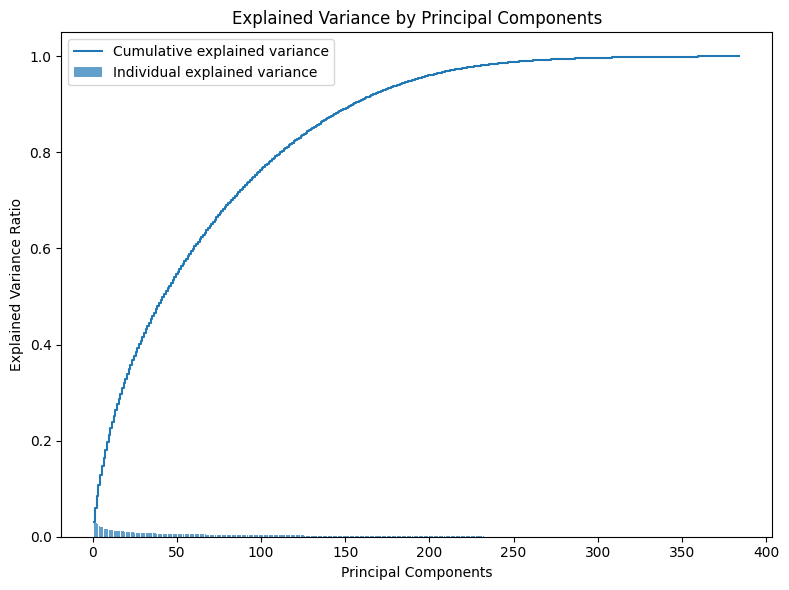

Number of components to retain 95% variance: 61
Original shape: (2104, 384)
Reduced shape: (2104, 61)


In [42]:


# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Choose the number of components to retain 95% of the variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.60) + 1  # Number of components for 95% variance

print(f"Number of components to retain 95% variance: {n_components}")

# Perform PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components)
X_reduced = pca_optimal.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_reduced.shape}")


In [43]:
# lr = LogisticRegression(random_state=0)

# X_reduced_dimension = compute_pca(X, n_components=2)
# print("Matrix X After number of features reduced to 2:- \n", X_reduced_dimension)

# X_train, X_test, y_train, y_test = train_test_split(X_reduced_dimension, y, test_size=0.2)
# lr.fit(X_train,y_train)
# y_pred = lr.predict(X_test)
# print(classification_report(y_test,y_pred)) #We are getting accuracy between 95% to 100%

In [44]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

In [45]:
data_clustering.head()

,Label,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,0,-0.692262,-0.155802,-0.687110,1.060948,-0.121113,1.244716,-0.352295,0.882637,0.192045,...,-1.263485,-0.996012,-0.852026,0.327494,0.143471,1.451954,-0.543698,0.539643,-1.210042,1.474789
1,0,-0.708689,0.787663,-1.118737,-0.009301,0.736682,-0.943742,0.624421,1.490889,-1.927950,...,1.353629,0.691712,1.917875,-0.717369,0.004782,0.606054,-0.688661,-0.925748,-0.795105,0.962743
2,0,-1.386679,0.147398,-0.187169,0.902459,1.328236,0.146159,-0.897161,-0.190800,-0.449401,...,1.149614,-0.684483,0.127628,0.408091,-0.493504,1.679327,-0.450296,-0.447901,0.446412,1.280128
3,0,-0.304886,-0.641011,0.230016,0.293537,1.509297,0.412171,0.327655,0.871491,-1.324675,...,0.931793,-0.269639,-0.033726,1.369338,0.400931,0.945773,-0.132017,-1.328170,0.625057,0.025302
4,0,-0.451693,-0.702269,-0.197921,0.770192,-0.566732,-0.007009,-0.145608,0.214972,-0.168320,...,-0.779114,0.378615,-0.127110,0.349195,-0.366955,0.985082,0.571249,0.588660,0.384987,0.845957


In [46]:
data_clustering.columns = data_clustering.columns.astype(str)

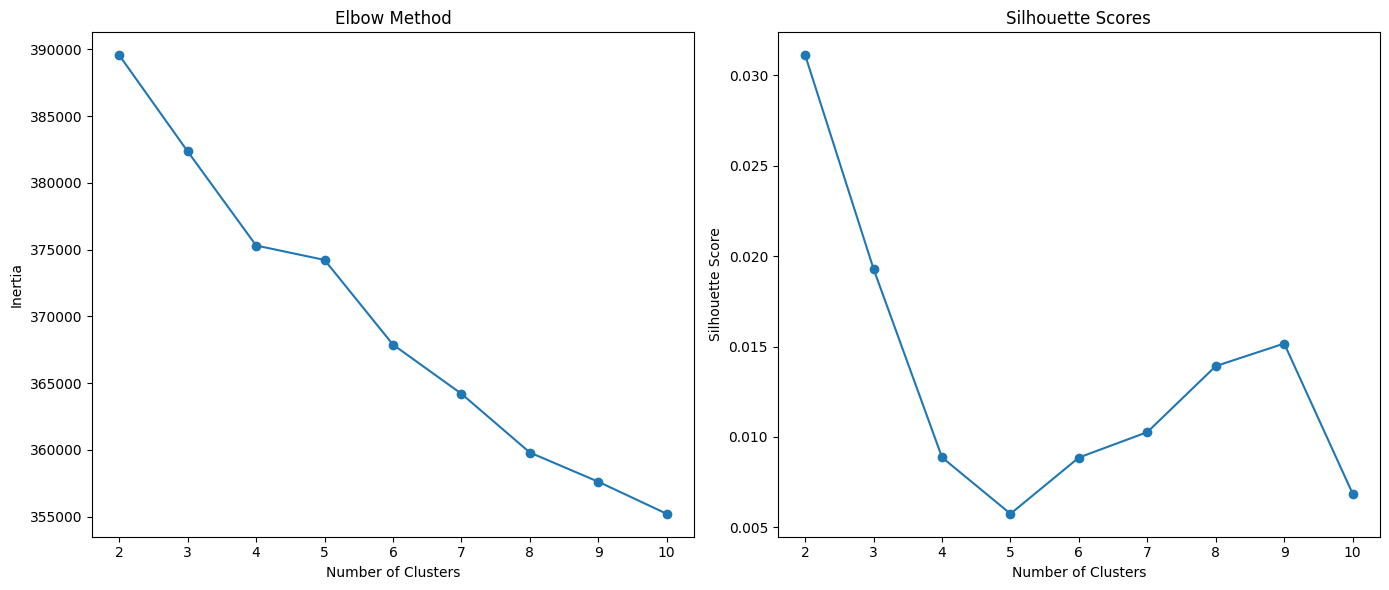

The optimal number of clusters is: 2


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate sample data (or replace this with your dataset)
# X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

# Define the range of cluster numbers to try
cluster_range = range(2, 11)

# Lists to store evaluation metrics
inertia = []
silhouette_scores = []

# Loop over the range of cluster numbers
for k in cluster_range:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia (sum of squared distances to centroids)
    inertia.append(kmeans.inertia_)

    # Compute silhouette score and append it
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)

plt.tight_layout()
plt.show()

# Find the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_clusters}")


In [48]:
# Assigning data points to clusters using K-Means with 3 clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_final.fit_predict(X)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [49]:
kmeans_final

KMeans(n_clusters=4, n_init=10, random_state=42)

In [63]:
x_reduced_df  = pd.DataFrame(X_reduced)

In [64]:
x_reduced_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-1.204689,3.528983,2.445674,3.504933,4.645207,0.137657,-2.203301,2.785196,3.795365,3.649575,...,1.427658,-1.630193,-0.889650,-1.700865,-0.441389,0.421384,-0.192880,-1.493348,0.486003,2.595003
1,-0.071208,3.233728,-0.723478,2.800427,2.869259,-4.527682,3.993123,-2.387813,-2.491935,2.431479,...,2.289228,2.249424,-1.742847,0.162881,-2.905586,-1.595266,-1.079549,0.514496,-0.937980,-0.562447
2,-1.554570,6.011073,-2.601635,1.185316,1.783499,-1.654736,-1.824248,1.365682,4.293172,1.779745,...,2.744641,-0.325892,1.412648,-1.587433,-0.050241,1.778197,-0.945557,0.006394,-1.572840,-0.707107
3,-3.372918,5.630942,-1.864033,4.415963,0.419155,3.594227,-0.806755,0.099262,6.248616,-2.343728,...,-0.106255,1.519115,0.615049,-0.988968,3.128366,3.529311,-2.344837,2.187751,-0.530431,0.172080
4,-0.117117,2.986697,-1.687159,1.423703,4.002712,-3.113828,-0.820207,0.150887,-0.173800,-2.547219,...,-1.040654,0.712324,1.058972,1.248905,2.403038,1.740563,-0.938169,0.052293,-0.880480,-1.123721


labels (2104,)


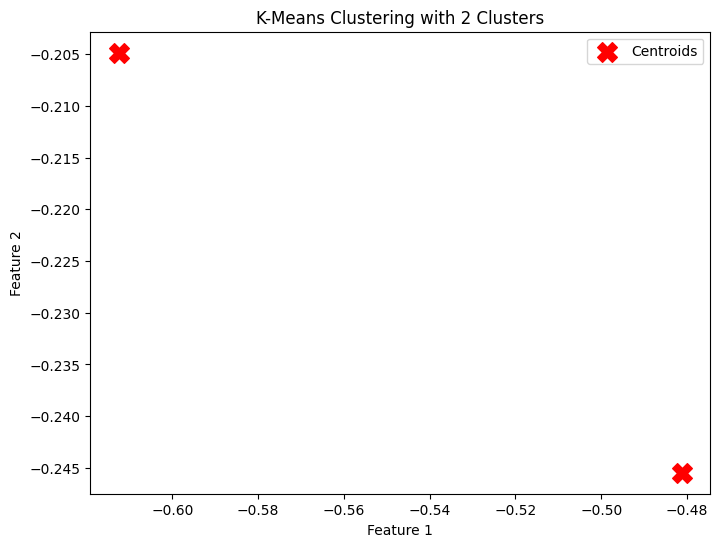

In [65]:
# # Perform k-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X)

# Cluster labels
labels = kmeans_final.labels_
print("labels", labels.shape)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x_reduced_df[:0], y[:0], c=labels[:0], cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [51]:
# Applying PCA for dimensionality reduction for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_clustering)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', alpha=0.8)
plt.title('Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

plt.show()

NameError: name 'cluster_labels' is not defined

Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)
print("y_pred \n", y_pred)
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = logreg.score(X_test, y_test)

print("Accuracy:", accuracy)

y_pred 
 [2 0 3 0 0 0 4 4 3 4 3 1 4 4 4 2 1 2 4 2 3 2 2 1 2 0 1 4 1 4 1 3 4 3 4 3 1
 0 2 0 0 4 0 3 4 4 4 1 4 0 3 1 4 4 0 0 0 2 1 3 1 1 3 4 1 4 2 1 4 3 0 0 1 1
 1 1 1 4 3 3 1 2 1 2 2 2 3 3 2 2 2 2 4 3 1 0 1 3 4 0 4 4 1 0 4 0 0 4 4 4 4
 0 0 3 2 4 4 3 3 2 3 4 0 1 1 2 1 4 4 2 1 2 4 2 1 4 2 3 0 4 1 3 0 0 0 1 4 4
 4 0 0 3 4 4 0 4 1 1 0 4 4 3 3 0 0 0 2 3 2 1 1 3 0 1 2 0 4 1 2 4 0 1 0 3 1
 0 3 2 0 1 1 1 3 4 1 4 0 1 4 4 0 2 3 1 3 3 4 1 1 4 4 0 4 3 1 1 2 0 1 4 4 0
 0 2 4 2 3 4 1 3 1 0 1 3 3 2 0 1 1 0 1 4 4 3 4 2 1 2 3 2 3 4 4 1 4 1 2 2 0
 0 1 1 1 2 4 3 2 0 1 3 0 4 3 3 0 4 1 3 4 4 3 3 4 1 2 3 1 1 3 1 1 2 4 1 2 2
 4 2 1 1 2 4 2 0 3 3 0 3 2 4 3 4 3 1 1 4 2 4 3 4 1 0 3 0 0 0 1 4 2 3 3 1 2
 0 1 4 4 1 4 1 4 2 3 2 2 4 0 4 4 1 4 0 4 4 4 1 1 1 4 3 2 4 1 2 4 0 3 4 4 0
 1 0 3 0 0 2 0 1 3 4 4 0 1 1 2 3 4 0 4 1 4 0 1 2 1 3 3 0 4 4 0 2 0 1 2 4 0
 1 1 1 0 3 0 1 3 4 4 3 2 1 4]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        81
           1       0.97    

Pickling The Model file For development

In [71]:
import pickle

In [72]:
pickle.dump(logreg, open('model.pkl', 'wb'))

In [73]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [74]:
pickled_model.predict(X_test)

array([2, 0, 3, 0, 0, 0, 4, 4, 3, 4, 3, 1, 4, 4, 4, 2, 1, 2, 4, 2, 3, 2,
       2, 1, 2, 0, 1, 4, 1, 4, 1, 3, 4, 3, 4, 3, 1, 0, 2, 0, 0, 4, 0, 3,
       4, 4, 4, 1, 4, 0, 3, 1, 4, 4, 0, 0, 0, 2, 1, 3, 1, 1, 3, 4, 1, 4,
       2, 1, 4, 3, 0, 0, 1, 1, 1, 1, 1, 4, 3, 3, 1, 2, 1, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 4, 3, 1, 0, 1, 3, 4, 0, 4, 4, 1, 0, 4, 0, 0, 4, 4, 4,
       4, 0, 0, 3, 2, 4, 4, 3, 3, 2, 3, 4, 0, 1, 1, 2, 1, 4, 4, 2, 1, 2,
       4, 2, 1, 4, 2, 3, 0, 4, 1, 3, 0, 0, 0, 1, 4, 4, 4, 0, 0, 3, 4, 4,
       0, 4, 1, 1, 0, 4, 4, 3, 3, 0, 0, 0, 2, 3, 2, 1, 1, 3, 0, 1, 2, 0,
       4, 1, 2, 4, 0, 1, 0, 3, 1, 0, 3, 2, 0, 1, 1, 1, 3, 4, 1, 4, 0, 1,
       4, 4, 0, 2, 3, 1, 3, 3, 4, 1, 1, 4, 4, 0, 4, 3, 1, 1, 2, 0, 1, 4,
       4, 0, 0, 2, 4, 2, 3, 4, 1, 3, 1, 0, 1, 3, 3, 2, 0, 1, 1, 0, 1, 4,
       4, 3, 4, 2, 1, 2, 3, 2, 3, 4, 4, 1, 4, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       4, 3, 2, 0, 1, 3, 0, 4, 3, 3, 0, 4, 1, 3, 4, 4, 3, 3, 4, 1, 2, 3,
       1, 1, 3, 1, 1, 2, 4, 1, 2, 2, 4, 2, 1, 1, 2,